In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load the input image
img = cv2.imread('4.jpg')
print(img.shape)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)

(3000, 3000, 3)
(3000, 3000)


In [3]:
def create_Sobel_filter_for_image(image, x_kernel=3, y_kernel=3, threshold_value = 100):
    # convert image to gray scale 
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = image
    # As the Kernel size increases, more pixels are now a part of the convolution process.
    # This signifies that the gradient map (edges) will tend to get blurry to a point the 
    # output looks likes a plastic cover has been wrapped around the edges.
    
    # define kernel for filter
    # Calculate gradient using Sobel kernels
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=x_kernel)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=y_kernel)

    # Calculate gradient magnitude
    grad_mag = cv2.magnitude(grad_x, grad_y)
     
    # reducing the threshold increases the edges
    # Apply thresholding to the gradient magnitude image
    _, binary_edge_map = cv2.threshold(grad_mag, threshold_value, 255, cv2.THRESH_BINARY)
    return binary_edge_map

In [17]:
# Read the input image in grayscale
img = cv2.imread('1.jpg', 0)
# Define a kernel for morphological operations
kernel = np.ones((5,5), np.uint8)
# Apply morphological closing to fill in small gaps in the edges
#closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
# Apply morphological opening to remove small objects and noise from the edges
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
# Save the output image
binary_edge_map1 = create_Sobel_filter_for_image(image=opening, x_kernel= 3, y_kernel=3, threshold_value=100)
cv2.imwrite('output.png', binary_edge_map1)

True

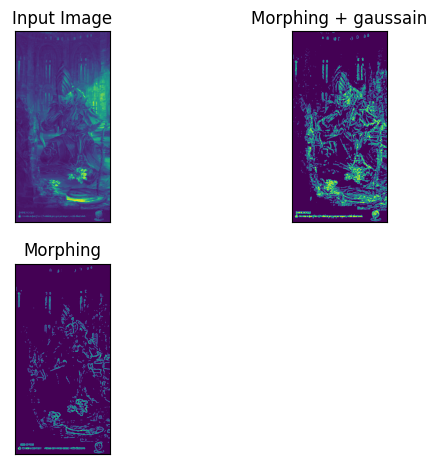

In [24]:
plt.subplot(221),plt.imshow(img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(binary_edge_map1)
plt.title('Morphing'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(binary_edge_map2)
plt.title("Morphing + gaussain"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

In [18]:
img = cv2.imread('1.jpg', 0)
binary_edge_map2 = create_Sobel_filter_for_image(image=img, x_kernel= 3, y_kernel=3, threshold_value=100)
cv2.imwrite('output2.png', )binary_edge_map2

True

In [6]:
# Gaussian Blur
"""Gaussian = cv2.GaussianBlur(image, (7, 7), 0)"""

'Gaussian = cv2.GaussianBlur(image, (7, 7), 0)'

In [7]:
# cv2.namedWindow('finalImg', cv2.WINDOW_NORMAL)
# cv2.imshow("finalImg",gray)

In [8]:
def create_frames_from_video(video_Path):
    video = cv2.VideoCapture(video_Path)
    frames_list = []
    filtered_frames_list = []

    while True:
        ret, frame = video.read()

        if ret:
            frame = cv2.resize(frame, (500, 500))
            frames_list.append(frame)
            binary_edge_map = create_Sobel_filter_for_image(image=frame, x_kernel= 3, y_kernel=3, threshold_value=100)
            # laplacian = cv2.Laplacian(frame, cv2.CV_64F)
            # laplacian = np.uint8(laplacian)
            #filtered_frame = cv2.resize(binary_edge_map, (960, 540)) 
            filtered_frames_list.append(binary_edge_map)
        else:
            break
    video.release()
    return frames_list, filtered_frames_list


In [9]:
frames_list, filtered_frames_list = create_frames_from_video("flick.mp4")

In [10]:
def show_video_from_frames(frames_list, filtered_frames_list):
    for i in range(len(filtered_frames_list)):
        cv2.imshow("frame", frames_list[i])
        cv2.imshow("filtered_frames", filtered_frames_list[i])
        if(cv2.waitKey(5) == ord('q')):
            break
    cv2.destroyAllWindows()

In [11]:
# cv2.imshow("frame", frames_list[0])
# cv2.imshow("filtered_frames", filtered_frames_list[0])
# if ord('q'):
#     cv2.waitKey(0)

# cv2.destroyAllWindows()

In [12]:
show_video_from_frames(frames_list, filtered_frames_list)

In [13]:
"""
# Importing all necessary libraries
import cv2
import os
  
# Read the video from specified path
cam = cv2.VideoCapture("C:\\Users\\Admin\\PycharmProjects\\project_1\\openCV.mp4")
  
try:
      
    # creating a folder named data
    if not os.path.exists('data'):
        os.makedirs('data')
  
# if not created then raise error
except OSError:
    print ('Error: Creating directory of data')
  
# frame
currentframe = 0
  
while(True):
      
    # reading from frame
    ret,frame = cam.read()
  
    if ret:
        # if video is still left continue creating images
        name = './data/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name)
  
        # writing the extracted images
        cv2.imwrite(name, frame)
  
        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break
  
# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()
"""

'\n# Importing all necessary libraries\nimport cv2\nimport os\n  \n# Read the video from specified path\ncam = cv2.VideoCapture("C:\\Users\\Admin\\PycharmProjects\\project_1\\openCV.mp4")\n  \ntry:\n      \n    # creating a folder named data\n    if not os.path.exists(\'data\'):\n        os.makedirs(\'data\')\n  \n# if not created then raise error\nexcept OSError:\n    print (\'Error: Creating directory of data\')\n  \n# frame\ncurrentframe = 0\n  \nwhile(True):\n      \n    # reading from frame\n    ret,frame = cam.read()\n  \n    if ret:\n        # if video is still left continue creating images\n        name = \'./data/frame\' + str(currentframe) + \'.jpg\'\n        print (\'Creating...\' + name)\n  \n        # writing the extracted images\n        cv2.imwrite(name, frame)\n  \n        # increasing counter so that it will\n        # show how many frames are created\n        currentframe += 1\n    else:\n        break\n  \n# Release all space and windows once done\ncam.release()\ncv2